<a href="https://colab.research.google.com/github/Nicocro/CV_Assignments/blob/master/4_2_Learning_features_from_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2 Learning Features from Data #

An alternative approach to handcrafting features that capture desired object properties is to learn these features from training data.

## 4.2.1 Unsupervised learning: PCA ## 

unsupervised learning approach  to find different components of variation present in our faces training set. 

*   List item
*   List item



## PCA background theory ## 

### Rationale ##

TODO

### Covariance and covariance matrix ###

The covariance $\sigma (x,y)$ of two random variables $x$ and $y$ is _defined_ as:

> $\sigma (x,y) = \frac{1}{m−1} \sum_{i=1}^m (x_i-\bar{x})(y_i−\bar{y})$

with $m$ samples. The variance $\sigma^2_x$ of a variable $x$ can also be expressed as the covariance with itself by by $\sigma(x,x)$.

#### Covariance Matrix ####

The sample covariance of $m$ observations (in our case: # of images) of $n$ variables (in our case: total # of pixels per image) is the square $nxn$ **covariance matrix** $C_{j,k}$ 
: 

> $C_{j,k} = \sigma(x_j,x_k)$ where $C \in R^{nxn}$

*   The covariance matrix is _symmetric_ since $\sigma (x_j,x_k)= \sigma (x_k,x_j)$
*   The diagonal entries of the covariance matrix are the variances and the other entries are the covariances

The entries of the covariance matrix can be expressed as:

> $c_{j,k}=\frac{1}{m-1}\sum_{i=1}^m (x_{ij}-\bar{x})(x_{ik}-\bar{x}_k)$

Following from this equation, knowing that our data set is expressed by the matrix $X \in R^{mxn} $ the covariance matrix can be computed for a data set _with zero mean_ with:

> $C = \frac{1}{m-1} X^TX$ 

by using the semi-definite matrix $X^TX$. Note that the size of the covariance matrix is independent from the number of samples. We could have had a different # of images but the $C$ would still be $nxn$. What defines the size of $C$ is the # of variables, or, in our case, of pixels. 

The **eigenvectors** of $C$ represent the axis along which the data varies the most. 



## SVD Singular Value Decomposition ##

the singular value decomposition (SVD) is a factorization of a real or complex matrix that generalizes the eigendecomposition of a square normal matrix to any $X_{m,n}$ matrix.

Specifically, the singular value decomposition of a real or complex matrix $X_{m,n}$ is a factorization of the form (link to theorem):

> $X = U\Sigma V^T$ where:

*   $U_{m,m}$ is a _unitary, orthonormal matrix_  whose columnsa re called **"left-singular vectors"**
*   $\Sigma_{m,n}$ is a rectangular _diagonal matrix_ whose entries $\sigma_i = \Sigma_{ii}$ are called **singular values** 
*   $V_{n,n}$ is a _orthonormal marix_ whose columns are called **"right-singular vectors"**

SVD is not unique: it is always possible to choose the decomposition so that the sinngular values $\Sigma_{ii}$ are in descending order. In this case, 

to do;;; K-truncated





## Relation between PCA and SVD ##

Let us apply SVD decomposition to our data matrix $X$.

> $X = U\Sigma V^T$

let us rewrite the covariance matrix in these terms:

> $\frac{1}{1-m} X^TX = \frac{1}{1-m}(U\Sigma V^T)^T(U\Sigma V^T) $ 

Generally, we know that $(AB)^T= B^TA^T$, so it follows that:

> $\frac{1}{1-m} X^TX = \frac{1}{1-m}(V\Sigma^T U^T)(U\Sigma V^T) $ 

$U$ is _orthonormal_ so: $U^T = U^{-1}$, from that follows that $U^TU = I_m$, which brings our relation to:

> $\frac{1}{1-m} X^TX = \frac{1}{1-m}V\Sigma^T \Sigma V^T $ 

At this stage we observe that both matrices $X^TX$ and $\Sigma^T \Sigma$ are square $nxn$ matrices and they are similar. Similar matrices have the same eigenvalues. 

Moreover, the $nxn$ covariance matrix $C$ is symmetric and can be diagonalized:

> $C = DLD^T = \frac{1}{1-m} V\Sigma^2 V^T$

Where $D$ is a matrix of eigenvectors (each column is an eigenvector) and $L$ is a diagonal matrix with eigenvalues $\lambda_i$ in the decreasing order on the diagonal. Thus, $D=V$ and **right-singular** vectors are _principal directions_ and singular values are related to the eigenvalues of covariance matrix via $\lambda_i = \frac{\sigma^2_i}{m-1}$

Projections of the data on the principal axes are called principal components, also known as PC scores. Principal components are given by:

> $XV=USV^TV=US$ 






## 0. Setup ##

Load the necessaries libraries, packages, dependencies

### Dataset pre-processing ###

Images have been carefully selected to be more representative.
20 Training images from subject A: Gordon Ramsey, have been selected, centered and cropped to a square 64x64 pixel format. These operations have been carried out offline through a design tools for more precision. The dataset size being small (20 images) allowed for this manual pre-processing

### Importing libraries ### 

The following code import libraries, packages and dependencies needeed

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import tensorflow as tf
import os
import requests
from pathlib import Path
from glob import iglob
import cv2 
from sklearn.decomposition import TruncatedSVD
import scipy

## 1. Build Matrix $X_{m,n}$

The following code uploads images from subject A - Gordon Ramsay - into a Pandas DataFrame. Images are loaded flattened out onto a series of 1 dimensional 64x64 = 4096 array.

The DataFrame can be seen as a matrix  𝑋𝑚,𝑛  with  𝑚  = number of samples (images) and  𝑛  = number of pixels per image.




In [0]:
faces = pd.DataFrame([])
for path in iglob('/content/drive/My Drive/Computer Vision/CV_dataset/SubjectA_GR/*.png'):
 img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
 face = pd.Series(img.flatten(),name = path.replace("/content/drive/My Drive/Computer Vision/CV_dataset/",""))
 faces = faces.append(face).astype(int)

for path in iglob('/content/drive/My Drive/Computer Vision/CV_dataset/SubjectB_JM/*.png'):
 img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
 face = pd.Series(img.flatten(),name=path.replace("/content/drive/My Drive/Computer Vision/CV_dataset/",""))
 faces = faces.append(face).astype(int)

Sanity check on the dataframe

In [4]:
print(len(faces))
print(len(faces.columns))
print(faces.head())

40
4096
                         0     1     2     3     ...  4092  4093  4094  4095
SubjectA_GR/GR – 12.png    66    59    59    61  ...   129   129   129   129
SubjectA_GR/GR – 13.png    64    74    64   102  ...     0     0     0     0
SubjectA_GR/GR – 11.png    66    64    64    76  ...   219   225   231   234
SubjectA_GR/GR – 10.png   110   110    93    99  ...   137   151   151   149
SubjectA_GR/GR – 14.png   170   170   186   234  ...    50    39    39    28

[5 rows x 4096 columns]


Display Images in a grid

In [0]:
def displayimages(df):
#This function is designed to take a dataframe with faces as an argument, 
# and plot the 20 faces in greyscale in one snapshot
    fig =plt.figure(figsize=(20,10))
    columns = 10
    rows  = 4
    ax=[]
    for i in range(len(df)) :
        imageshaped = np.reshape(np.array(df.iloc[i]), (64,64))
        ax.append(fig.add_subplot(rows, columns,i+1))
        ax[-1].set_title("fig#"+str(i))
        plt.imshow(imageshaped, cmap='gray')
        
    plt.show()

    return

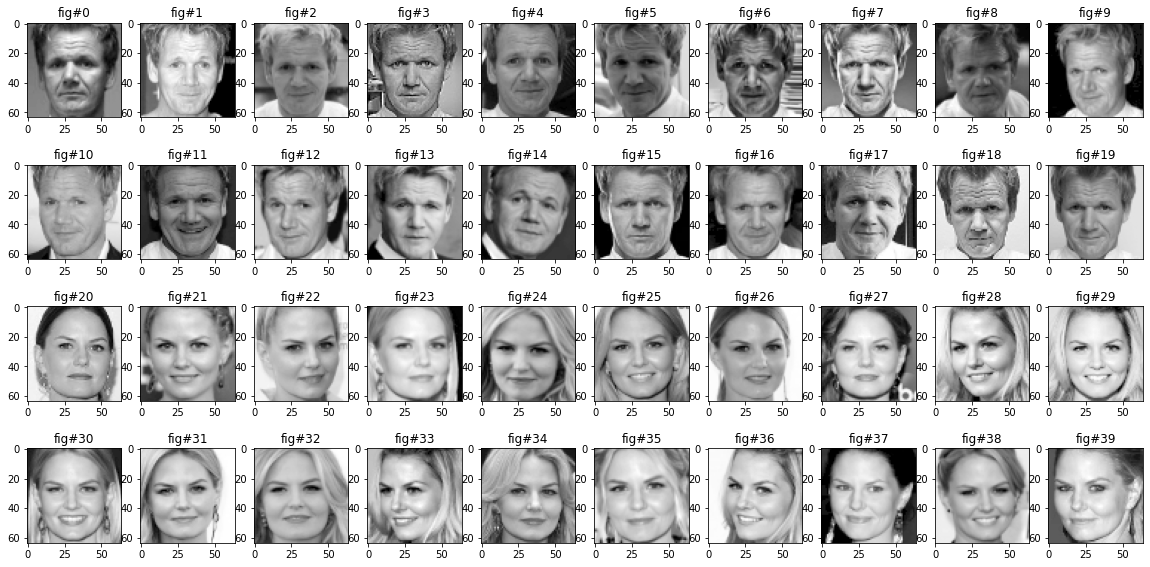

In [6]:
#show the images in a 4x5 grid
displayimages(faces)

## 2. Mean subtraction ##

Performing mean subtraction: The data need to be centered.  

Let $X_{m,n}$ be the images matrix as defined before. 
Let $\hat{x}_i$ be the (row) vectors representing each image ($\hat{x}_i$ has thus 4096 coordinates).
Centering the data is achieved by imposing the mean to be equal to 0. 

$\frac{1}{m}\sum_{i=0}^{m-1} \hat{x}_i$

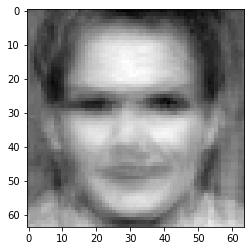

In [8]:
#returns a pandas series with key value = imgpath e value column (index=0) with the mean of
#the column 
faces_mean = faces.apply(lambda x: x.mean(), axis=0).astype(int)

#display the mean face
mean_face = np.reshape(np.array(faces_mean), (64,64))
plt.imshow(mean_face, cmap='gray')

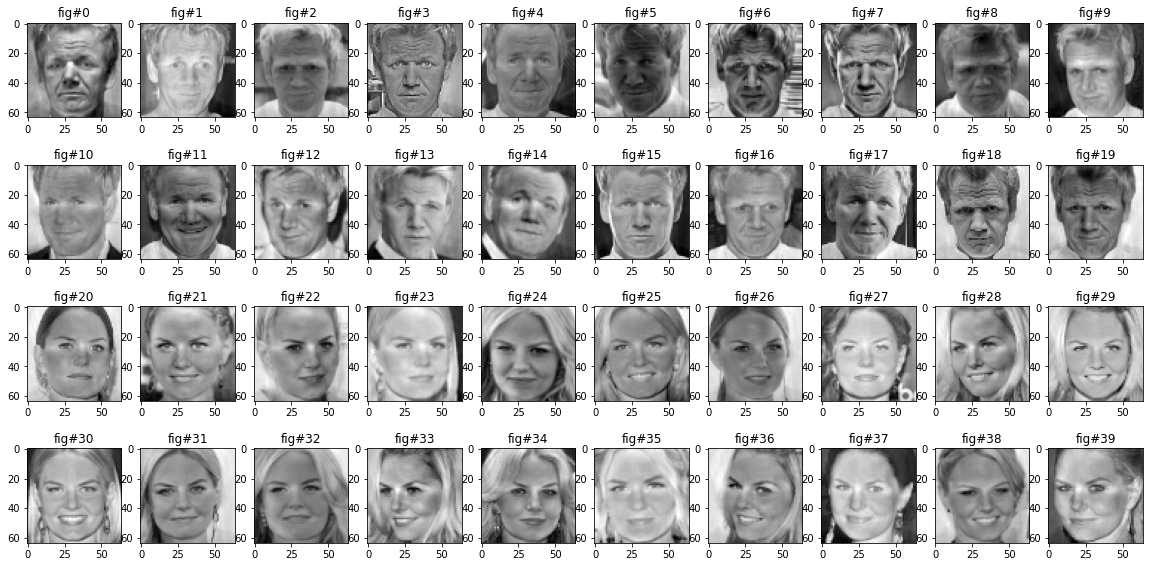

In [9]:
#returns a pandas dataframe with centered images (original images - the mean)
faces_centered = faces.subtract(faces_mean, axis = 1)

#show the centered images 
displayimages(faces_centered)

## 3. Compute SVD ##

compute SVD and show principal components

X: (40, 4096)
U: (40, 40)
Sigma: (40,)
V^T: (40, 4096)
<class 'numpy.ndarray'>


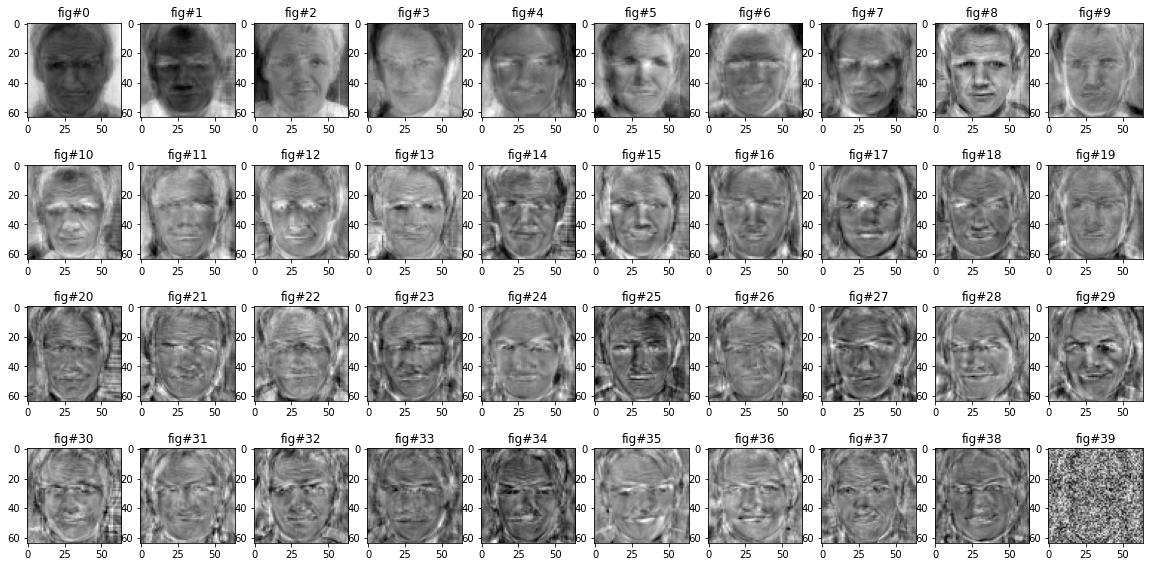

In [10]:
U, Sigma, VT = np.linalg.svd(faces_centered, full_matrices=False)

# Sanity check on dimensions
print("X:", faces_centered.shape)
print("U:", U.shape)
print("Sigma:", Sigma.shape)
print("V^T:", VT.shape)
print(type(VT))

#put the principal components (eigenfaces in a dataframe) and display the result
principal_components = pd.DataFrame(VT)
displayimages(principal_components)

## 4. Calculate weights #

In [11]:
#calculate weights of the eigenfaces 
weights = faces_centered.dot(principal_components.transpose())
print('weights:', weights.shape)

weights: (40, 40)


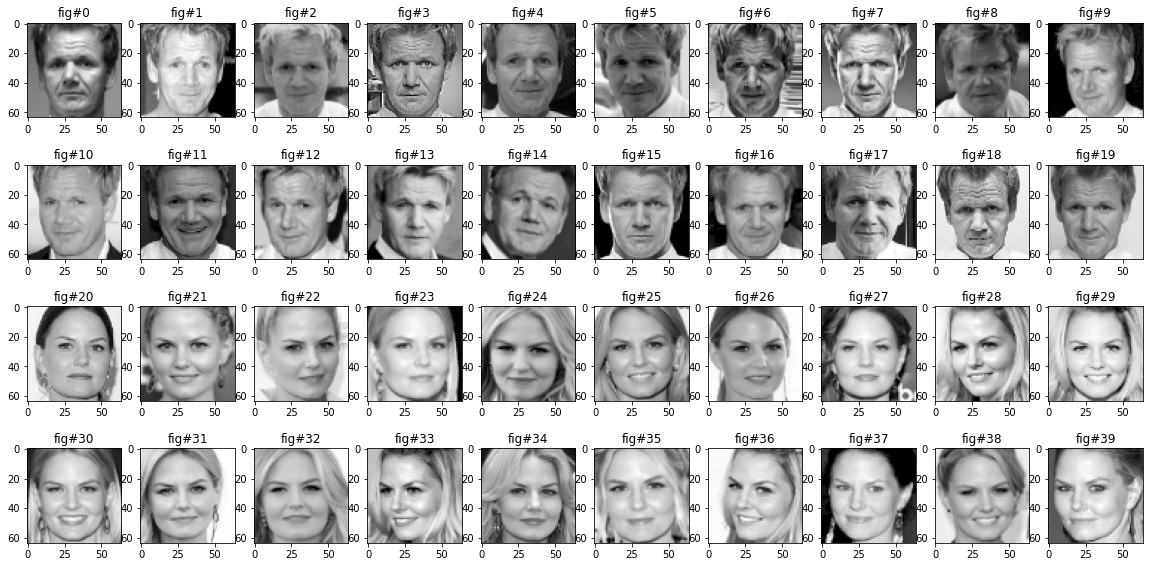

In [12]:
# reconstruct initial images as a linear combination of the 20 eigenfaces with associated weights
reconstructed_faces = weights.dot(principal_components)
# add back the mean
reconstructed_faces = reconstructed_faces.add(faces_mean, axis = 1)

#check 
displayimages(reconstructed_faces)

## 5. Calculate each face with few eigenfaces ##

Now we can show each face as the linear combination of just some weights with the associated eigenfaces. We will visualize how many eigenfaces + weights we need to keep in order to have a sufficiently good representation of the selected face

In [0]:
# selct a k number of principal components and project a set of faces on those components. Reconstruct original images as a linear combination
# of principal components 

def eigenface_redu(centeredfaces_df, facesmean_sr, eigenfaces_df, k):
  
  #coordinates coincide with weights
  reduced_eigenfaces = eigenfaces_df.head(k)
  coordinates = pd.DataFrame(centeredfaces_df.dot(reduced_eigenfaces.transpose()))
  
  reconstructed_imgs = coordinates.dot(reduced_eigenfaces)
  reconstructed_imgs = reconstructed_imgs.add(facesmean_sr, axis = 1)

  return coordinates, reconstructed_imgs

weights_reduced: (40, 19)
prova: (40, 4096)


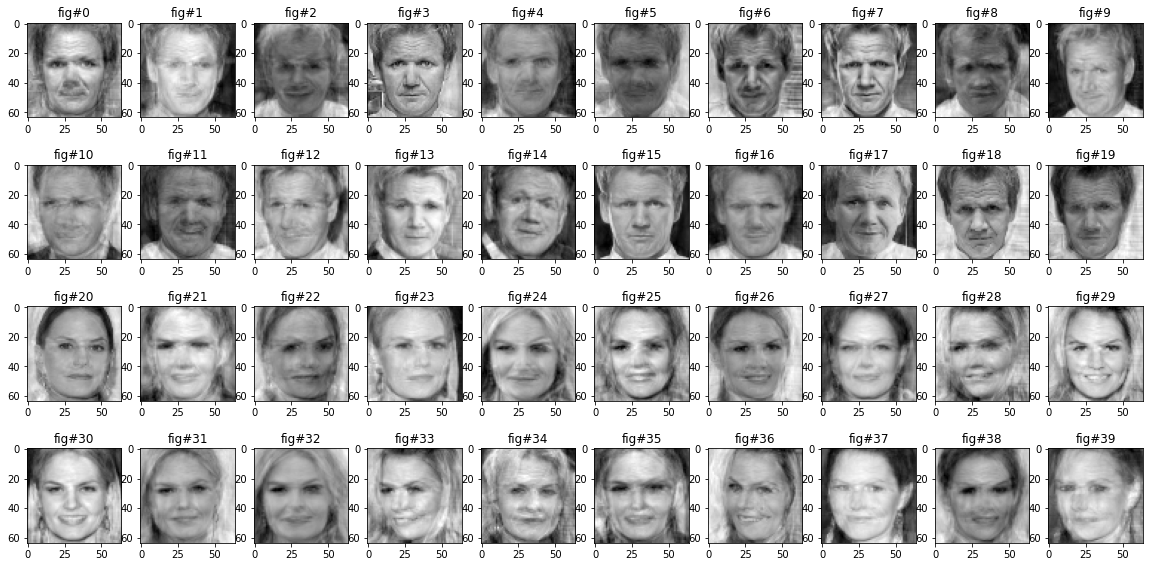

In [66]:
weights_reduced, prova = eigenface_redu(faces_centered, faces_mean, principal_components, 19)

print('weights_reduced:', weights_reduced.shape)
print('prova:',prova.shape)
displayimages(prova)

## 6. Project the test images onto the k-components ##

project the test images onto the same k-components and visualize the new faces


In [0]:
test_faces = pd.DataFrame([])
for path in iglob('/content/drive/My Drive/Computer Vision/CV_dataset/A_test/*.png'):
 test_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
 test_face = pd.Series(test_img.flatten(),name = path.replace("/content/drive/My Drive/Computer Vision/CV_dataset/",""))
 test_faces = test_faces.append(test_face).astype(int)

for path in iglob('/content/drive/My Drive/Computer Vision/CV_dataset/B_test/*.png'):
 test_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
 test_face = pd.Series(test_img.flatten(),name=path.replace("/content/drive/My Drive/Computer Vision/CV_dataset/",""))
 test_faces = test_faces.append(test_face).astype(int)

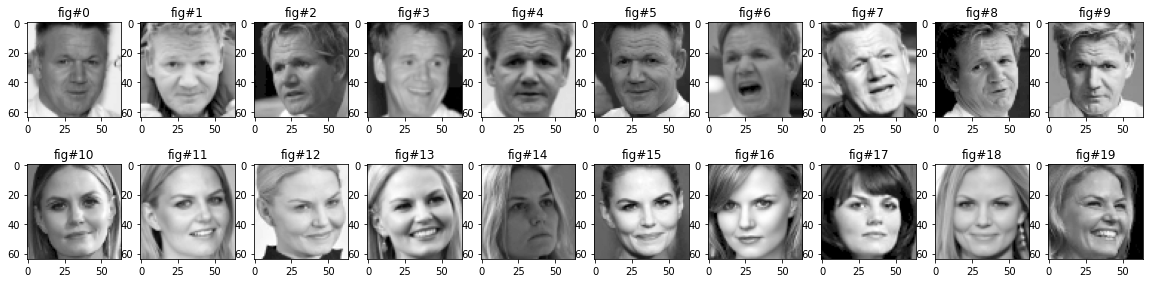

In [33]:
displayimages(test_faces)

project onto principal components

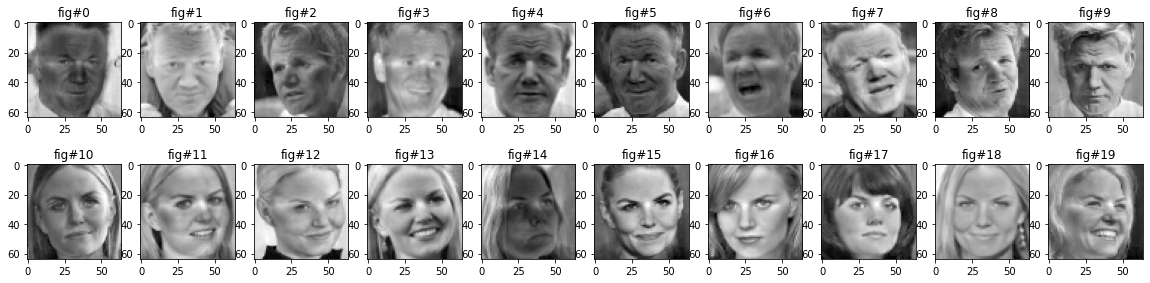

In [35]:
test_faces_centered = test_faces.subtract(faces_mean, axis = 1)

#show the centered images 
displayimages(test_faces_centered)

prova: (20, 4096)


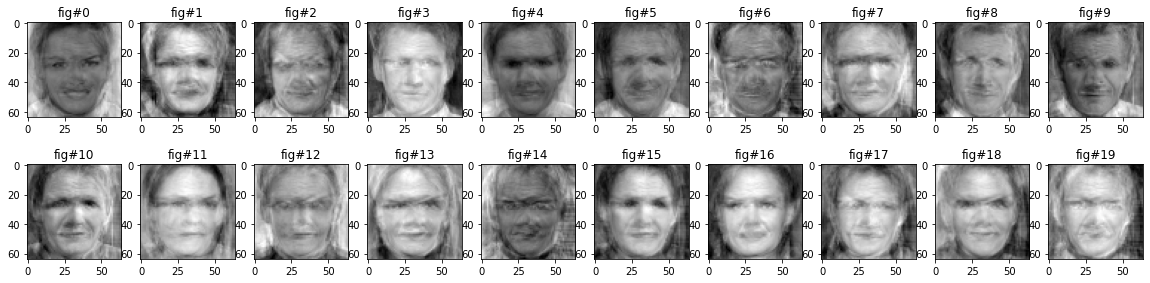

In [44]:
test_weights, test_eigencombi = eigenface_redu(test_faces_centered, faces_mean, principal_components, 19)

print('prova:', test_eigencombi.shape)
displayimages(test_eigencombi)

In [45]:
print('weights_reduced:', weights_reduced.shape)
print('test weights:', test_weights.shape)

weights_reduced: (40, 19)
test weights: (20, 19)


             0            1   ...           38           39
0   2242.663350  3321.567937  ...  2021.306100  3835.726245
1   2354.027944  2305.593881  ...  2033.325216  3347.483752
2   1860.080989  4155.289527  ...  2877.734882  4618.451790
3   2368.842039  2660.468173  ...  1658.649007  3147.265257
4   1713.065640  3238.045968  ...  1625.903510  3723.813545
5   2195.068560  3973.387175  ...  2306.640866  4177.849433
6   2000.812810  3334.037110  ...  2635.531551  4680.067037
7   2964.239149  3225.848394  ...  2809.892715  2838.759375
8   2945.696108  4363.359275  ...  3334.331844  4980.129137
9   3238.986359  3814.135474  ...  2573.182406  4003.792079
10  3123.674990  3990.883323  ...  3025.725655  3947.015100
11  2770.693298  2110.459112  ...  1516.970994  2619.023834
12  3336.147498  2407.923579  ...  2341.887483  2445.392087
13  3524.111533  2494.607612  ...  2756.455257  2823.756547
14  2518.820435  3951.572138  ...  3432.895566  4881.166600
15  3012.947144  2278.132930  ...  2013.

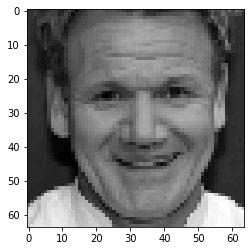

In [91]:
distances = pd.DataFrame(scipy.spatial.distance.cdist(test_weights.iloc[:,1:], weights_reduced.iloc[:,1:], metric='euclidean'))
print(distances)
min_index = distances.idxmin(axis=1)
print(min_index)
print(type(min_index))

similar_face = np.reshape(np.array(faces.iloc[min_index[0]]), (64,64))
plt.imshow(similar_face, cmap='gray')

Find distance between train images and test imagees ( closest similarity)


In [0]:
def simil(trainfaces_df, testface, k_components):

  #center train images
  train_faces_mean = trainfaces_df.apply(lambda x: x.mean(), axis=0).astype(int)
  train_faces_centered = trainfaces_df.subtract(faces_mean, axis = 1)
  #center test images
  centered_test_face = pd.DataFrame(testface.subtract(faces_mean))
  t_centered_test_face = centered_test_face.transpose()
  #find all the eigenfaces
  U_train, Sigma_train, VT_train = np.linalg.svd(train_faces_centered, full_matrices=False)
  eigenfaces_train = pd.DataFrame(VT_train)

  #find weight (coordinates) of the train images --> scalars to linearly combinate eigenfaces
  reduced_eigenfaces_train = eigenfaces_train.head(k_components)
  w_train_coordinates = pd.DataFrame(train_faces_centered.dot(reduced_eigenfaces_train.transpose()))
  
  #find weights (coordinates) of the test image --> scalars to linearly combinate train eigenfaces 
  w_test_coordinates = pd.DataFrame(t_centered_test_face.dot(reduced_eigenfaces_train.transpose()))

  #calculate euclidean distance between 
  distances = pd.DataFrame(scipy.spatial.distance.cdist(w_test_coordinates.iloc[:,1:], w_train_coordinates.iloc[:,1:], metric='euclidean'))
  min_index = distances.idxmin(axis=1)

  print(min_index)
  
  similar_face = np.reshape(np.array(trainfaces_df.iloc[min_index[0]]), (64,64))
  plt.imshow(similar_face, cmap='gray')

  return

Visualize the image we are testing

      B_test/B_test_JM_1.png
0                         50
1                         66
2                         70
3                         78
4                         76
...                      ...
4091                       0
4092                       0
4093                       0
4094                       0
4095                       0

[4096 rows x 1 columns]


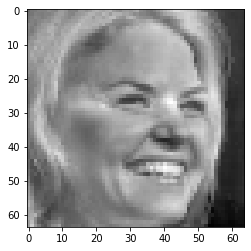

In [104]:
 trial_img = cv2.imread('/content/drive/My Drive/Computer Vision/CV_dataset/B_test/B_test_JM_1.png', cv2.IMREAD_GRAYSCALE)
 trial_face = pd.Series(trial_img.flatten(),name = path.replace("/content/drive/My Drive/Computer Vision/CV_dataset/",""))
 
 centered_test_face = trial_face.subtract(faces_mean)

 trial_imageshaped = np.reshape(np.array(centered_test_face), (64,64))
 plt.imshow(trial_imageshaped, cmap='gray')

 df_trial_face = pd.DataFrame(trial_face)
 print(df_trial_face)

Spitting out the most similar image in the train images


0    28
dtype: int64


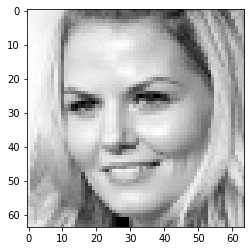

In [105]:
simil(faces, trial_face, 19)